**T074 Kermeen**

****

**Practical 9**
**Aim: Principal Component Analysis (PCA)**

* **Perform PCA on a dataset to reduce dimensionality.**

* **Evaluate the explained variance and select the appropriate number of principal components.**

* **Visualize the data in the reduced-dimensional space.**



In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/content/banana_quality.csv")
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [3]:
df.shape

(8000, 8)

In [4]:
print(df.dtypes)

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object


In [5]:

df1 = df.copy()
columns_to_drop = ["id", "image_path"]
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df.drop(columns=columns_to_drop, axis=1, inplace=True)
if "label_text" in df1.columns:
    df1 = df1.drop("label_text", axis=1)


In [6]:
import numpy as np
df1= df1.select_dtypes(include=['float64','int64'])
# Drop rows with NaN values
df1 = df1.dropna()
#standardize the feature matrix
X= StandardScaler().fit_transform(df1)
#create a PCA that will retain 99% of the variance
pca= PCA (n_components=0.99, whiten=True)
#conduct PCA
X_pca = pca.fit_transform(X)

In [7]:
print('Original number of features: ', X.shape[1])
print('Reduced number of features: ', X_pca.shape[1])

Original number of features:  7
Reduced number of features:  7


In [8]:
# Reducing Features When Data Is Linearly Inseparable
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
#create linearly inseparable data
X, _=make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)
#Apply kernel PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel='rbf', gamma=5, n_components=1)
X_kpca = kpca.fit_transform(X)

In [9]:
print('Original number of features: ', X.shape[1])
print('Reduced number of features: ', X_kpca.shape[1])

Original number of features:  2
Reduced number of features:  1


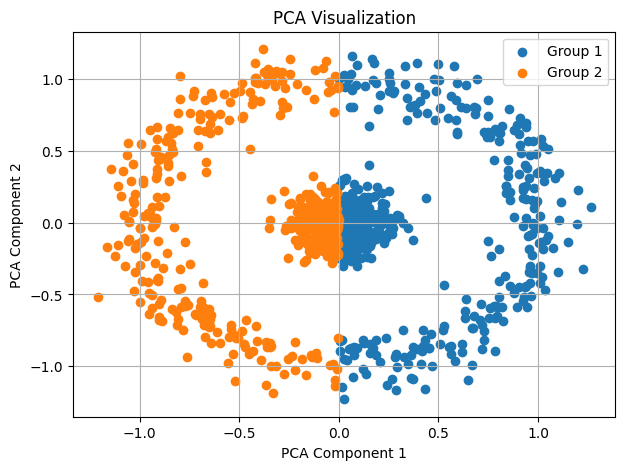

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
# PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
group1 = pca_data[:, 0] >= np.median(pca_data[:, 0])
group2 = pca_data[:, 0] < np.median(pca_data[:, 0])
plt.figure(figsize=(7,5))
plt.scatter(pca_data[group1, 0], pca_data[group1, 1], label="Group 1")
plt.scatter(pca_data[group2, 0], pca_data[group2, 1], label="Group 2")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization")
plt.legend()
plt.grid(True)
plt.show()

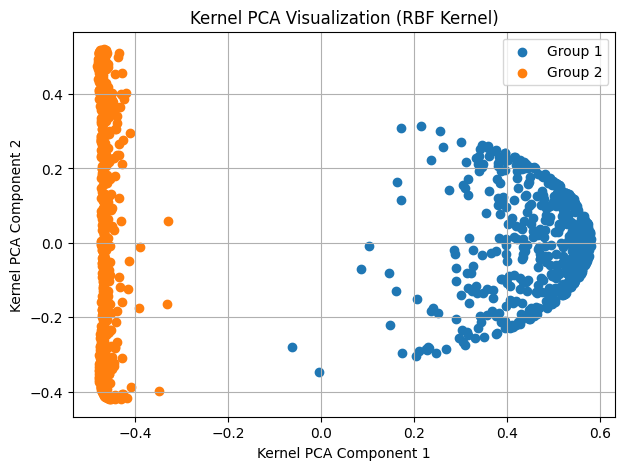

In [11]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import numpy as np
# Kernel PCA with RBF kernel (non-linear PCA)
kpca = KernelPCA(kernel='rbf', gamma=5, n_components=2)
kpca_data = kpca.fit_transform(X)
group1 = kpca_data[:, 0] >= np.median(kpca_data[:, 0])
group2 = kpca_data[:, 0] < np.median(kpca_data[:, 0])
plt.figure(figsize=(7,5))
plt.scatter(kpca_data[group1, 0], kpca_data[group1, 1], label="Group 1")
plt.scatter(kpca_data[group2, 0], kpca_data[group2, 1], label="Group 2")
plt.xlabel("Kernel PCA Component 1")
plt.ylabel("Kernel PCA Component 2")
plt.title("Kernel PCA Visualization (RBF Kernel)")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
y_original = df['Quality'].map({'Good': 1, 'Bad': 0})
y = y_original.loc[df1.index]
x_scaled = StandardScaler().fit_transform(df1)
if len(np.unique(y)) < 2:
    print("Warning: Less than two distinct classes found. LDA may not be meaningful.")
else:
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit_transform(x_scaled, y)
    print('Original number of features: ', x_scaled.shape[1])
    print('Reduced number of features: ', X_lda.shape[1])

Original number of features:  7
Reduced number of features:  1


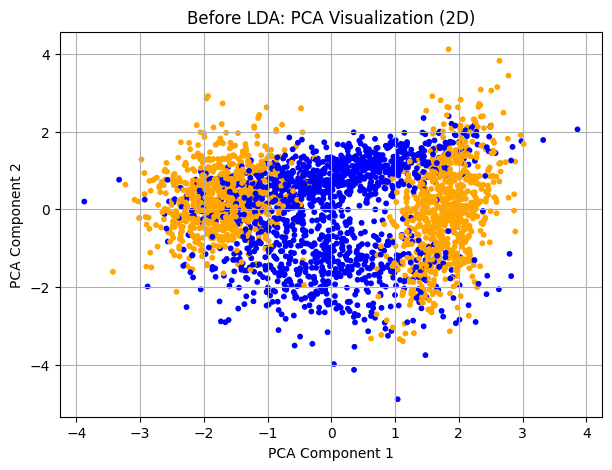

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
x_for_pca = df1
y_for_plot = df['Quality'].map({'Good': 1, 'Bad': 0})
y_for_plot = y_for_plot.loc[df1.index]

sample_size = 3000
idx = np.random.choice(len(x_for_pca), sample_size, replace=False)
x_sample = x_for_pca.iloc[idx]
y_sample = y_for_plot.iloc[idx]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_sample)

pca_vis = PCA(n_components=2)
pca_2d = pca_vis.fit_transform(x_scaled)

colors = np.where(y_sample == 0, 'blue', 'orange')
plt.figure(figsize=(7,5))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c=colors, s=10)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Before LDA: PCA Visualization (2D)")
plt.grid(True)
plt.show()

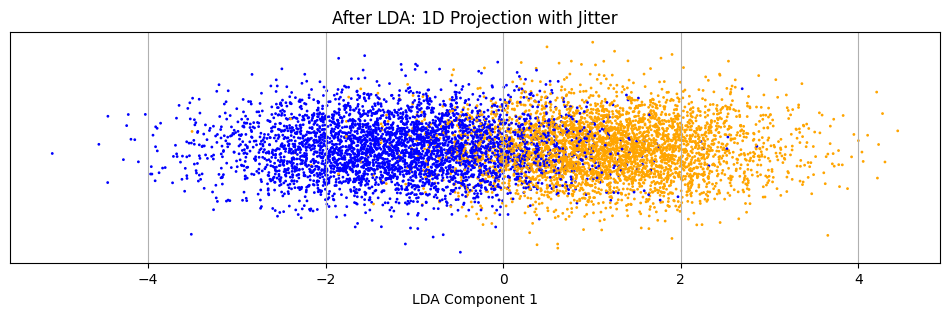

In [17]:
y_lda_in = y_for_plot
# Jitter for visibility
y_jitter = np.random.normal(0, 0.02, size=len(X_lda))
# Colors
colors = np.where(y_lda_in == 0, "blue", "orange")
plt.figure(figsize=(12,3))
plt.scatter(X_lda, y_jitter, c=colors, s=1)
plt.yticks([])
plt.xlabel("LDA Component 1")
plt.title("After LDA: 1D Projection with Jitter")
plt.grid(True)
plt.show()